# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = (requests.get(city_url)).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        #city_lat = city_weather["lat"]
        #city_lng = city_weather["lng"]
        #city_max_temp = city_weather["max_temp"]
        #city_humidity = city_weather["humidity"]
        #city_clouds = city_weather["clouds"]
        #city_wind = city_weather["wind"]
        #city_country = city_weather["country"]
        #city_date = city_weather["date"]

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather['coord']['lon']
        city_temp_max = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_temp_max,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto lempira
Processing Record 2 of Set 1 | chibuto
Processing Record 3 of Set 1 | imbituba
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | jinchang
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | tura
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | saratamata
City not found. Skipping...
Processing Record 11 of Set 1 | al jawf
Processing Record 12 of Set 1 | ebon
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | lompoc
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | berezovyy
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ceres
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | ceerigaabo
Processing Record 21 of Set 1 | udachny
Processing Record 22 of Set 1 | taiohae
C

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto lempira,15.2667,-83.7667,30.08,66,75,0.00,HN,1717950955
1,chibuto,-24.6867,33.5306,17.16,67,94,2.17,MZ,1717950955
2,imbituba,-28.2400,-48.6703,24.40,57,24,5.60,BR,1717950956
3,port-aux-francais,-49.3500,70.2167,6.72,98,100,17.72,TF,1717950872
4,tiksi,71.6872,128.8694,0.12,96,96,2.46,RU,1717950875


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto lempira,15.2667,-83.7667,30.08,66,75,0.00,HN,1717950955
1,chibuto,-24.6867,33.5306,17.16,67,94,2.17,MZ,1717950955
2,imbituba,-28.2400,-48.6703,24.40,57,24,5.60,BR,1717950956
3,port-aux-francais,-49.3500,70.2167,6.72,98,100,17.72,TF,1717950872
4,tiksi,71.6872,128.8694,0.12,96,96,2.46,RU,1717950875


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

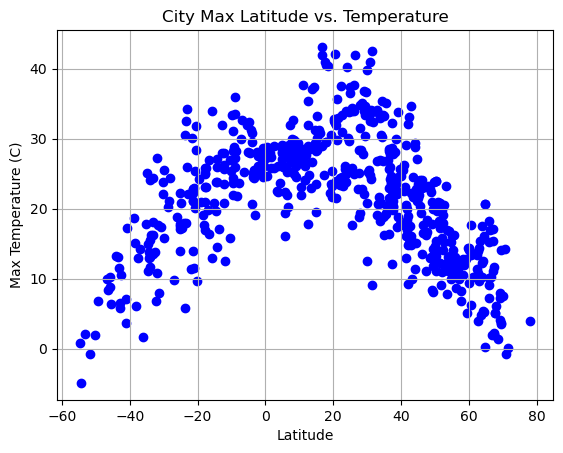

In [23]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='Blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

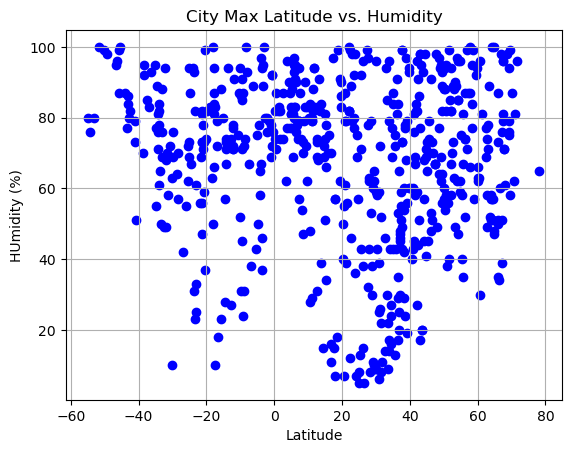

In [24]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='Blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("HUmidity (%)")
plt.title("City Max Latitude vs. Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

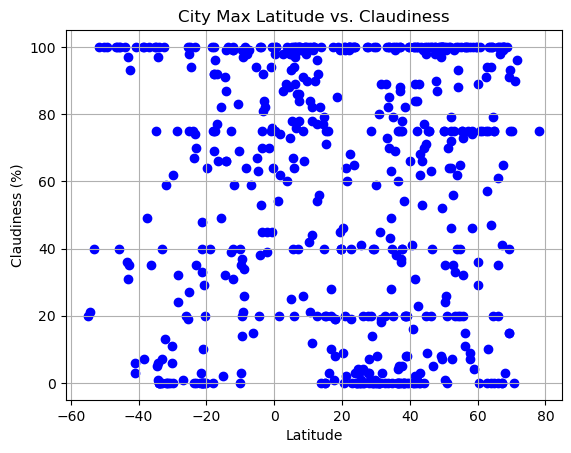

In [25]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='Blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Claudiness (%)")
plt.title("City Max Latitude vs. Claudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

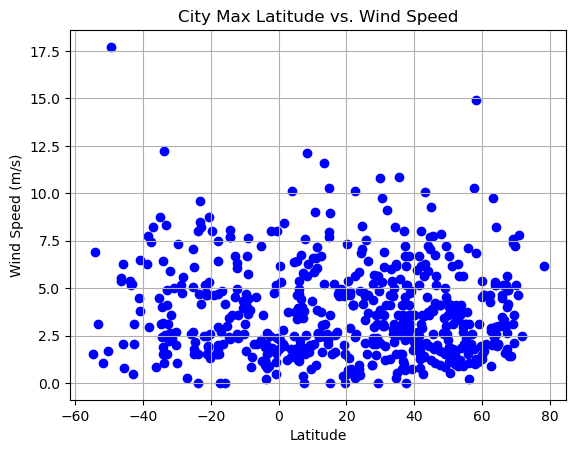

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='Blue')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Max Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, coordinates, fontsize=12, color="red")

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto lempira,15.2667,-83.7667,30.08,66,75,0.00,HN,1717950955
4,tiksi,71.6872,128.8694,0.12,96,96,2.46,RU,1717950875
5,jinchang,38.4953,102.1739,22.70,24,82,2.39,CN,1717950956
6,talnakh,69.4865,88.3972,3.45,99,93,2.10,RU,1717950789
7,tura,25.5198,90.2201,25.84,92,1,3.31,IN,1717950883


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,chibuto,-24.6867,33.5306,17.16,67,94,2.17,MZ,1717950955
2,imbituba,-28.2400,-48.6703,24.40,57,24,5.60,BR,1717950956
3,port-aux-francais,-49.3500,70.2167,6.72,98,100,17.72,TF,1717950872
8,puerto natales,-51.7236,-72.4875,-0.75,100,100,1.03,CL,1717950872
11,waitangi,-43.9535,-176.5597,13.23,87,100,5.36,NZ,1717950956


###  Temperature vs. Latitude Linear Regression Plot

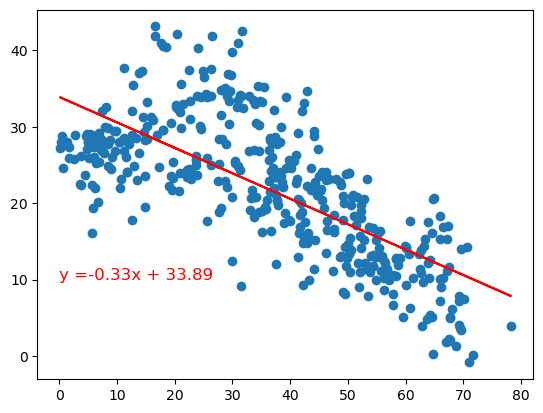

In [45]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (0,10))

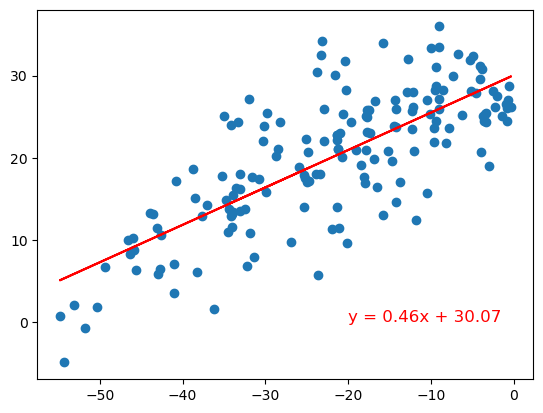

In [52]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-20,0))

**Discussion about the linear relationship:** The analysis of maximum temperature in relation to latitude in the northern hemisphere using linear regression reveals a significant and negative correlation. Put simply, as one moves further north from the equator, there's a consistent decrease in maximum temperature. Conversely, when moving closer to the equator from higher latitudes, the maximum temperature consistently rises.

### Humidity vs. Latitude Linear Regression Plot

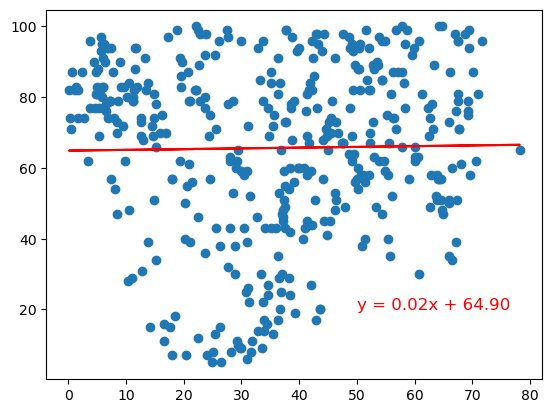

In [55]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 20))

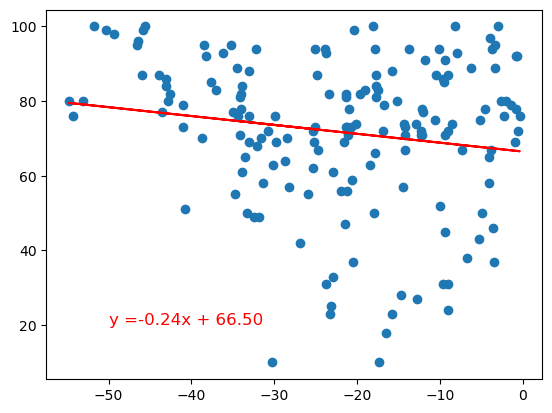

In [57]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-50, 20))

**Discussion about the linear relationship:** In the analysis of humidity in relation to latitude in the northern hemisphere through linear regression, it's evident that there exists a mild, positive correlation. Essentially, as one progresses in latitude, there's a slight uptick in humidity levels. This increase, however, is subtle, as indicated by the gentle slope of the linear regression line. Conversely, as we approach the equator, there's a slight decrease in humidity levels, albeit not significantly pronounced.

### Cloudiness vs. Latitude Linear Regression Plot

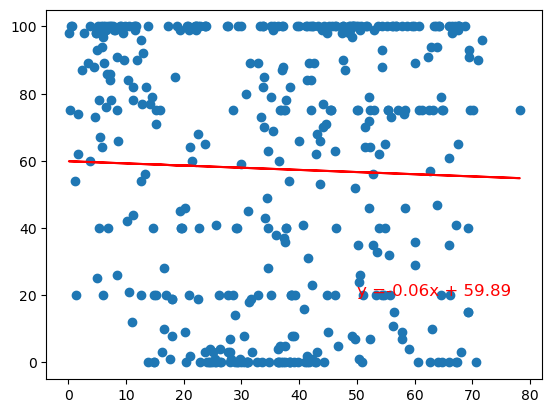

In [58]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (50, 20))

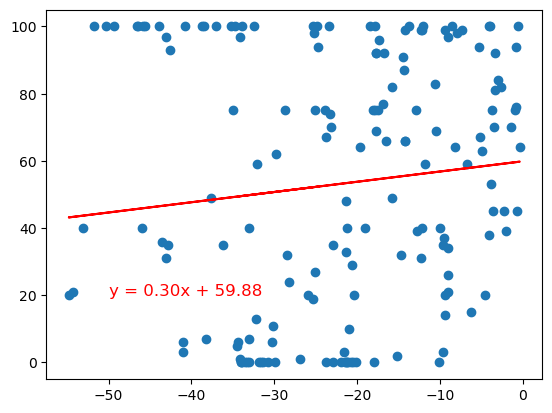

In [60]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 20))

**Discussion about the linear relationship:** The linear regression analysis of cloudiness against latitude in the northern hemisphere suggests a negligible or potentially non-existent positive correlation. Put simply, as you venture away from or toward the equator, there's little to no discernible impact on cloudiness levels. This lack of correlation is evident in the scatterplot, where data points are dispersed widely across the graph, indicating a lack of clear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

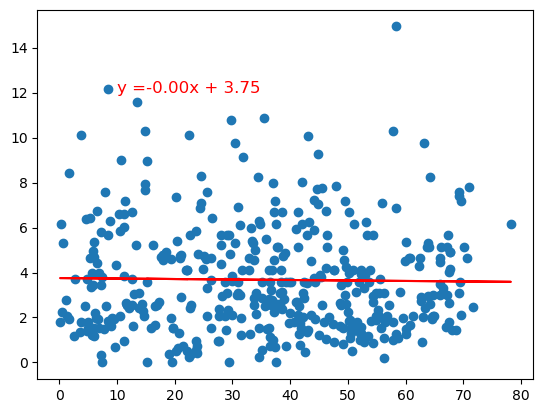

In [61]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

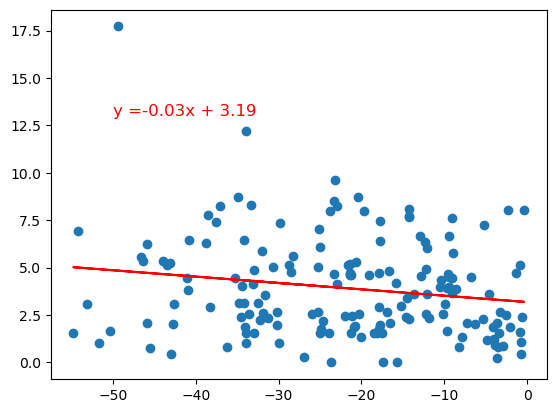

In [63]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 13))